## 2023 06/16 REMBG

*Last Updated*: 2023-09-11

### Authors
* Hannah Zhang (hannahzhang@ucsb.edu)


### Overview
This Jupyter notebook is intended to demonstrate

* AutoML experiments on full hand images with removed backgrounds from 11khands dataset generated by REMBG


### Key Results

- Extra Trees Regressor, Light Gradient Boosting Machine, and Dummy Regressor perform the best
- 11khands images are blurry -> could affect glcm features

In [ ]:
# --- Imports

# External packages
from pycaret import regression
from pycaret.datasets import get_data
import os
import cv2
from dermaml import data
from dermaml import features
import PIL
from PIL import Image
import numpy as np
import mlflow
import matplotlib.pyplot as plt
import pandas as pd
import skimage


In [3]:
# Dataset
dataset_name = "11khands"

# AutoML
experiment_name = "11khands-automl-sample-test"
num_best_models = 5
random_seed = 123  # seed used for random number generators to ensure reproducibility of results in this notebook

In [10]:
image_folder = '/Users/hannahzhang/Downloads/11khands_test_ims_2/'
image_files = os.listdir(image_folder)

images = []
for filename in image_files:
    img = cv2.imread(os.path.join(image_folder, filename))
    if img is not None:
        images.append(img)
        print(filename)

Hand_0000003.jpg
Hand_0000002.jpg
Hand_0003093.jpg
Hand_0009409.jpg
Hand_0001045.jpg
Hand_0003097.jpg
Hand_0000005.jpg
Hand_0000004.jpg
Hand_0003096.jpg
Hand_0001046.jpg
Hand_0003094.jpg
Hand_0000006.jpg
Hand_0003095.jpg
Hand_0001047.jpg
Hand_0001803.jpg
Hand_0000880.jpg
Hand_0001807.jpg
Hand_0001806.jpg
Hand_0000878.jpg
Hand_0001757.jpg
Hand_0001804.jpg
Hand_0001805.jpg
Hand_0000879.jpg
Hand_0000135.jpg
Hand_0001015.jpg
Hand_0009313.jpg
Hand_0000082.jpg
Hand_0000083.jpg
Hand_0009312.jpg
Hand_0001014.jpg
Hand_0000134.jpg
Hand_0000877.jpg
Hand_0001016.jpg
Hand_0009310.jpg
Hand_0001758.jpg
Hand_0000081.jpg
Hand_0000080.jpg
Hand_0001759.jpg
Hand_0009311.jpg
Hand_0000876.jpg
Hand_0000133.jpg
Hand_0001013.jpg
Hand_0001761.jpg
Hand_0000084.jpg
Hand_0001760.jpg
Hand_0001012.jpg
Hand_0009314.jpg
Hand_0000132.jpg
Hand_0001049.jpg
Hand_0001048.jpg
Hand_0000140.jpg
Hand_0009410.jpg
Hand_0009411.jpg
Hand_0009413.jpg
Hand_0009412.jpg


In [11]:
len(images)

55

In [12]:
removed_ims = []

for im in images:
    output = data.remove(im)
    removed_ims.append(output)

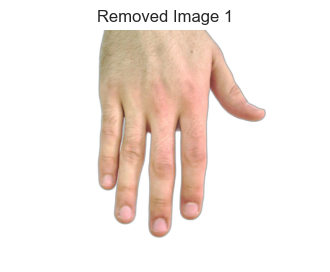

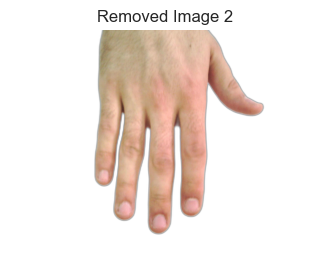

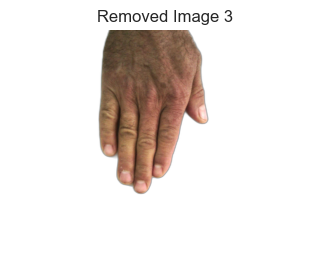

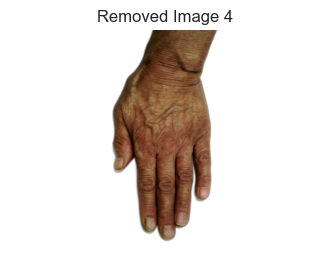

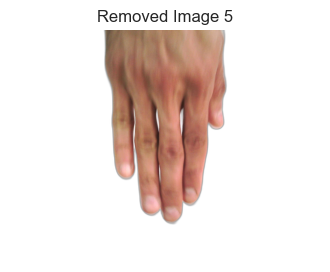

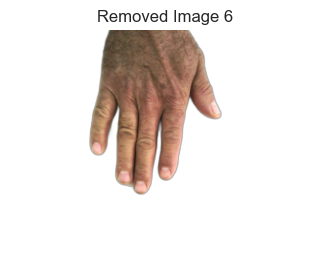

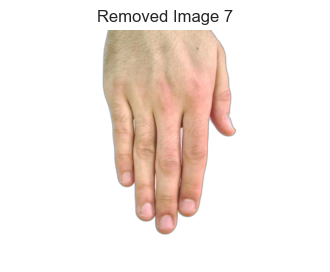

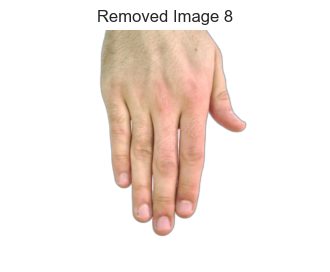

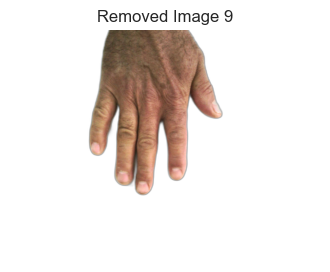

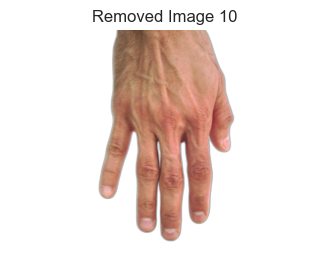

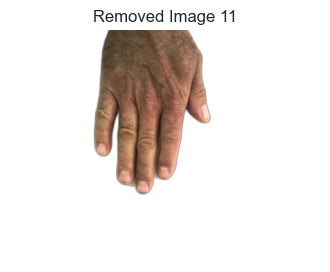

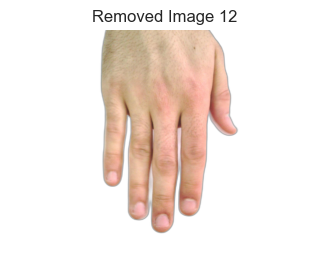

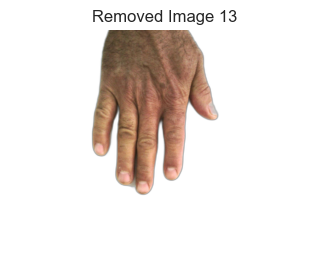

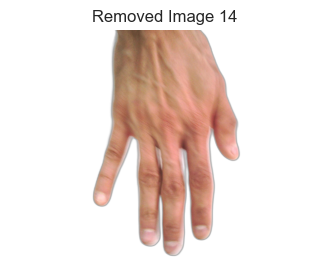

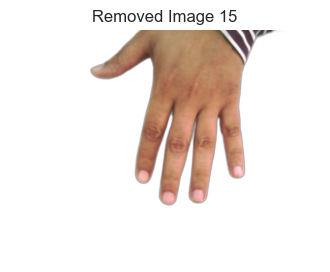

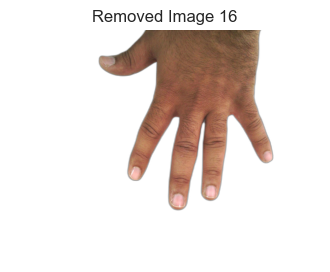

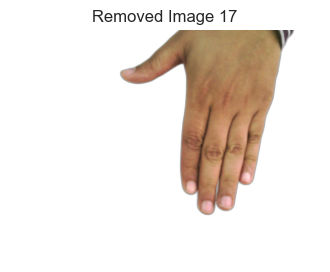

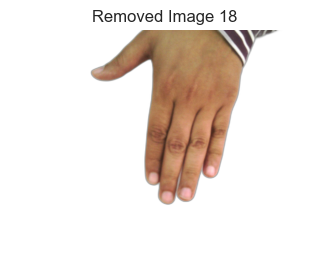

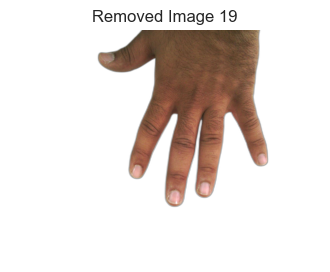

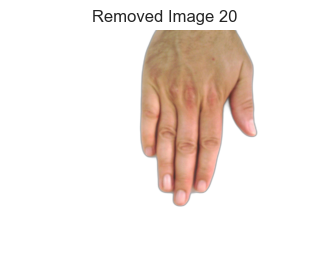

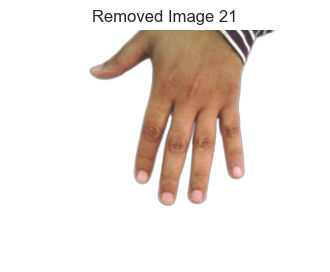

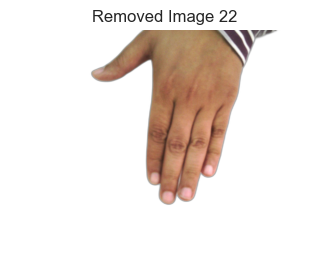

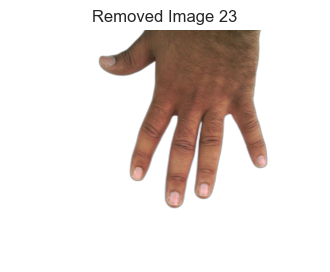

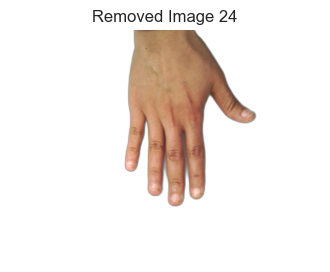

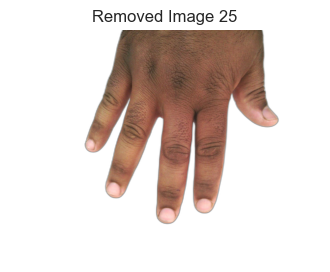

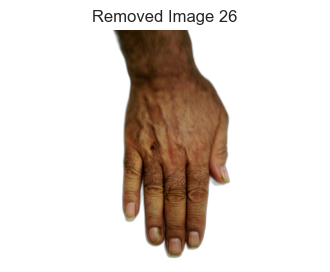

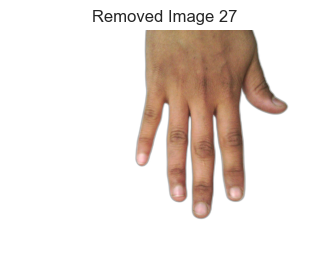

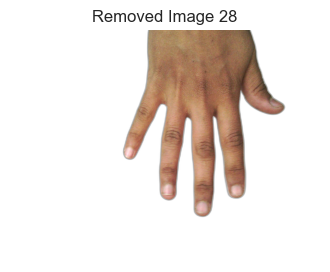

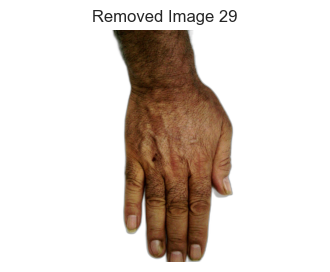

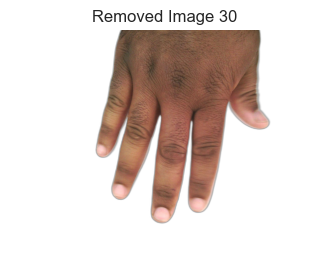

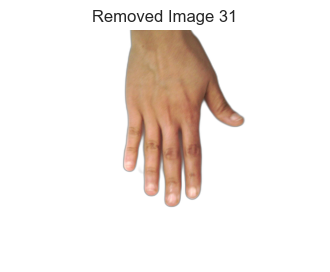

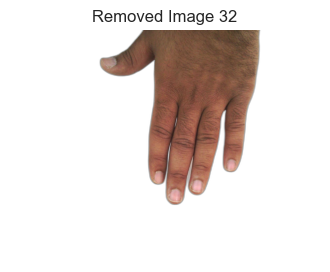

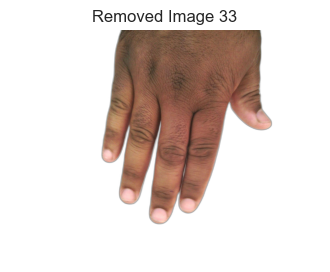

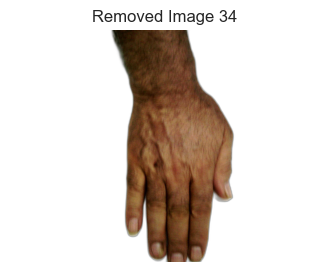

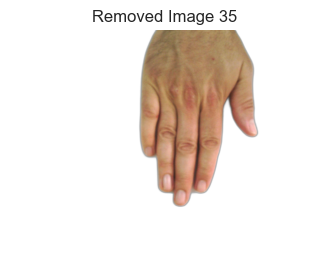

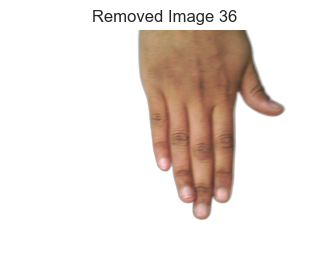

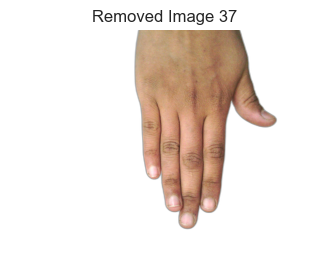

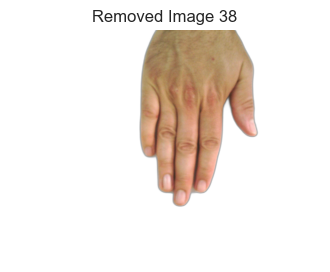

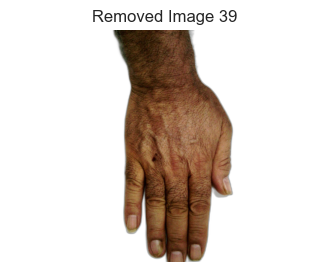

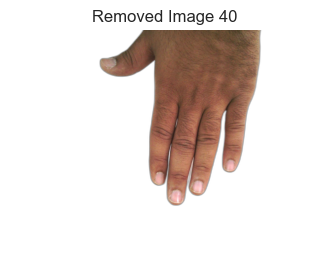

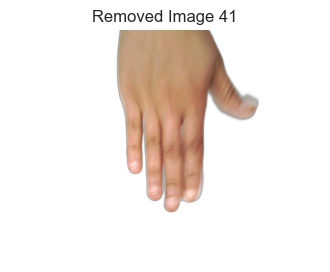

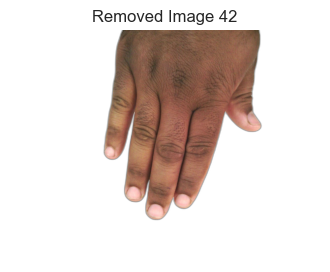

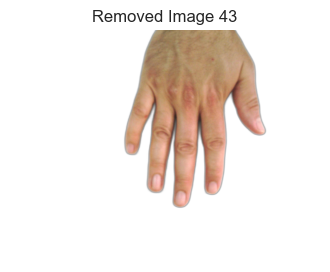

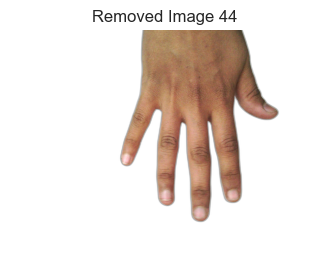

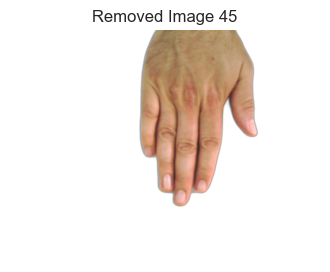

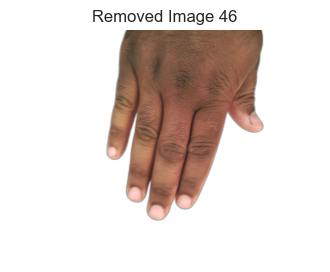

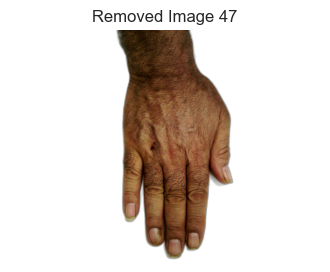

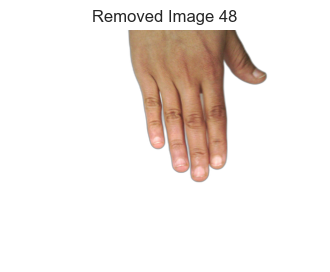

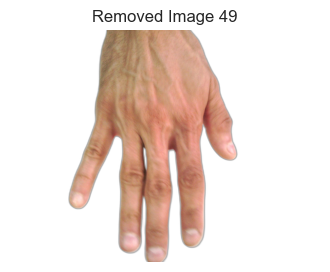

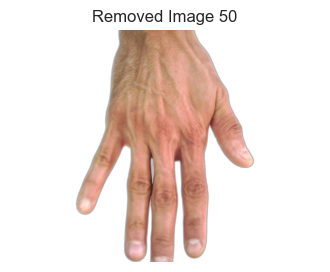

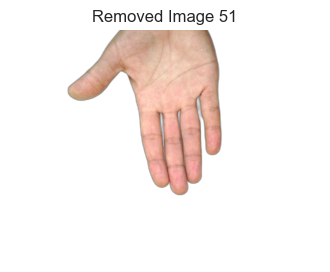

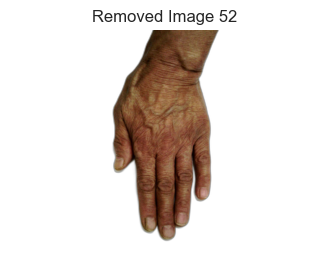

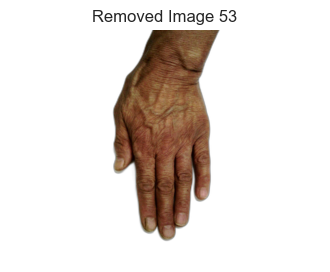

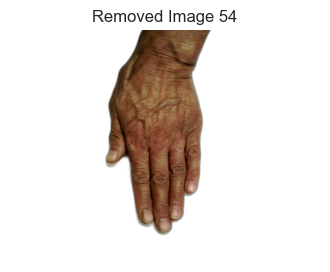

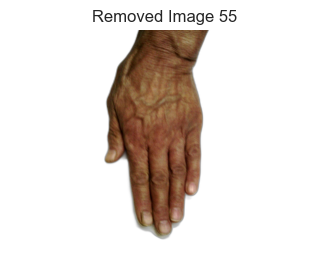

In [13]:
import matplotlib.pyplot as plt

# Assuming removed_ims contains a list of BGRA images
for i, im in enumerate(removed_ims):
    # Convert BGRA image to RBGA
    grayscale_im = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA)

    plt.figure(figsize=(4, 4))
    plt.imshow(grayscale_im, cmap='gray') 
    plt.title(f'Removed Image {i + 1}')
    plt.axis('off')
    plt.show()


Load in CSV File

In [14]:
csv_file = '/Users/hannahzhang/Downloads/HandInfo2.csv'

# Read the CSV file
df = pd.read_csv(csv_file)

In [64]:
print(f"Columns: {list(df.columns)}")

Columns: ['age', 'imageName']


In [15]:
print(df)

    age         imageName    Contrast  Correlation    Energy  Homogeneity
0    27  Hand_0000002.jpg  203.127349     0.983606  0.682752     0.745349
1    27  Hand_0000003.jpg  197.375098     0.985735  0.679800     0.737202
2    27  Hand_0000004.jpg  156.429767     0.988324  0.707524     0.758500
3    27  Hand_0000005.jpg  154.331557     0.988360  0.710458     0.760179
4    27  Hand_0000006.jpg  187.885954     0.986131  0.696765     0.750303
5    20  Hand_0000080.jpg  118.678234     0.985800  0.740918     0.774292
6    20  Hand_0000081.jpg   69.882487     0.988955  0.752214     0.788908
7    20  Hand_0000082.jpg  150.347052     0.976904  0.737344     0.772244
8    20  Hand_0000083.jpg  148.053056     0.975818  0.743444     0.774815
9    20  Hand_0000084.jpg  162.567439     0.973997  0.736779     0.769159
10   21  Hand_0000132.jpg   78.414923     0.987160  0.807678     0.834520
11   21  Hand_0000133.jpg   86.261734     0.989541  0.763707     0.817718
12   21  Hand_0000134.jpg   90.822343 

GLCM Extraction

In [66]:
glcm_features = []

for im, filename in zip(removed_ims, image_files):
    contrast, correlation, energy, homogeneity = features.compute_glcm(im)

    # Append the GLCM features for each image along with the file name
    glcm_features.append({
        'Filename': filename,
        'Contrast': contrast[0, 0],
        'Correlation': correlation[0, 0],
        'Energy': energy[0, 0],
        'Homogeneity': homogeneity[0, 0]
    })

In [67]:
print(glcm_features)

[{'Filename': 'Hand_0000003.jpg', 'Contrast': 197.37509822361548, 'Correlation': 0.9857346628035261, 'Energy': 0.6797997098614227, 'Homogeneity': 0.7372015890505252}, {'Filename': 'Hand_0000002.jpg', 'Contrast': 203.1273490073145, 'Correlation': 0.9836060824925553, 'Energy': 0.68275186674649, 'Homogeneity': 0.7453491249858042}, {'Filename': 'Hand_0003093.jpg', 'Contrast': 87.08640752351094, 'Correlation': 0.9780212276654197, 'Energy': 0.8020648501267956, 'Homogeneity': 0.8262481548944608}, {'Filename': 'Hand_0009409.jpg', 'Contrast': 77.33164263322884, 'Correlation': 0.9724924981195566, 'Energy': 0.7675318835479015, 'Homogeneity': 0.7907826154864263}, {'Filename': 'Hand_0001045.jpg', 'Contrast': 140.40082967607108, 'Correlation': 0.9808107858702382, 'Energy': 0.7316571458794439, 'Homogeneity': 0.777641063566698}, {'Filename': 'Hand_0003097.jpg', 'Contrast': 110.59193312434695, 'Correlation': 0.9777286703135503, 'Energy': 0.7862907770212979, 'Homogeneity': 0.8116905942749368}, {'Filenam

In [ ]:
glcm_df = pd.DataFrame(glcm_features)
print(f"Columns: {list(glcm_df.columns)}")

In [69]:
# Set the image filenames as the index in the new GLCM DataFrame
glcm_df.set_index('Filename', inplace=True)

In [ ]:
# Merging DataFrames with different column names
merged_data = df.merge(glcm_df, left_on='imageName', right_on='Filename', how='inner')

# Save the merged DataFrame back to the CSV file
merged_data.to_csv(csv_file, index=False)

In [ ]:
print(f"Columns: {list(merged_data.columns)}")

In [17]:
merged_data.drop(columns=['imageName'], inplace=True)

In [18]:
print(f"Columns: {list(merged_data.columns)}")

Columns: ['age', 'Contrast', 'Correlation', 'Energy', 'Homogeneity']


In [19]:
print(merged_data)

    age    Contrast  Correlation    Energy  Homogeneity
0    27  203.127349     0.983606  0.682752     0.745349
1    27  197.375098     0.985735  0.679800     0.737202
2    27  156.429767     0.988324  0.707524     0.758500
3    27  154.331557     0.988360  0.710458     0.760179
4    27  187.885954     0.986131  0.696765     0.750303
5    20  118.678234     0.985800  0.740918     0.774292
6    20   69.882487     0.988955  0.752214     0.788908
7    20  150.347052     0.976904  0.737344     0.772244
8    20  148.053056     0.975818  0.743444     0.774815
9    20  162.567439     0.973997  0.736779     0.769159
10   21   78.414923     0.987160  0.807678     0.834520
11   21   86.261734     0.989541  0.763707     0.817718
12   21   90.822343     0.985906  0.798731     0.834899
13   21   87.081252     0.985748  0.795885     0.829801
14   21  109.301617     0.989555  0.787849     0.826921
15   26  107.342199     0.975166  0.752597     0.788356
16   26  104.501176     0.973131  0.753582     0

AutoML Regression

In [20]:
# --- Perform AutoML Evaluation

# Set up the dataset for AutoML regression
regression.setup(data=merged_data,
                 target="age",
                 log_experiment=True,
                 experiment_name=experiment_name,
                 session_id=random_seed,
                ) 

# Automatically train, test, and evaluate models
best_models = regression.compare_models(n_select=num_best_models, verbose=False)

,Description,Value
0,Session id,123
1,Target,age
2,Target type,Regression
3,Original data shape,"(55, 5)"
4,Transformed data shape,"(55, 5)"
5,Transformed train set shape,"(38, 5)"
6,Transformed test set shape,"(17, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


Traceback (most recent call last):
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 304, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 397, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1306, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1299, in _read_helper
    result = read_yaml(root, file_name)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/utils/file_utils.py", line 282, in read_yaml
    raise MissingConfigException(f"Yaml file '{file_path}' does not exist.")
mlflow.e

In [76]:
for model in best_models:
    print(model)
    print()

ExtraTreesRegressor(n_jobs=-1, random_state=123)

LGBMRegressor(n_jobs=-1, random_state=123)

DummyRegressor()

LinearRegression(n_jobs=-1)

BayesianRidge()



In [77]:
# Display score table
regression.pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,6.6079,130.1171,9.3250,-0.7117,0.2216,0.1887,0.018
lightgbm,Light Gradient Boosting Machine,14.5245,305.0857,16.4972,-1.0878,0.3982,0.3973,0.009
dummy,Dummy Regressor,14.5245,305.0857,16.4972,-1.0878,0.3982,0.3973,0.005
lr,Linear Regression,11.6453,202.5967,13.9077,-1.7217,0.3881,0.3731,0.202
br,Bayesian Ridge,12.7591,240.9139,14.9034,-1.7248,0.3721,0.3652,0.004
lar,Least Angle Regression,12.7601,228.0546,14.7432,-1.7876,0.4548,0.4089,0.004
lasso,Lasso Regression,12.8120,240.3292,14.8908,-1.8211,0.3787,0.3692,0.005
llar,Lasso Least Angle Regression,12.8120,240.3292,14.8908,-1.8211,0.3787,0.3692,0.004
en,Elastic Net,12.8134,240.3513,14.8913,-1.8233,0.3789,0.3693,0.004
omp,Orthogonal Matching Pursuit,12.8167,240.4243,14.8930,-1.8279,0.3791,0.3695,0.004


In [78]:
# --- Extra Trees Regressor

et_model = regression.create_model('et')
et_model_tuned = regression.tune_model(et_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.7325,444.1459,21.0748,-12.6660,0.5547,0.6029
1,7.8875,70.3361,8.3867,0.6311,0.1330,0.1238
2,2.1825,7.0781,2.6605,0.8281,0.0816,0.0711
3,8.2375,90.5960,9.5182,0.7918,0.2178,0.2212
4,2.0575,10.2662,3.2041,0.9268,0.1044,0.0702
5,10.6775,206.0385,14.3540,0.4088,0.3888,0.3611
6,11.1825,391.5665,19.7880,-0.1841,0.4114,0.1925
7,1.4650,3.2305,1.7974,0.9736,0.0600,0.0495
8,4.6967,34.9235,5.9096,0.2824,0.1644,0.1348


Traceback (most recent call last):
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 304, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 397, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1306, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1299, in _read_helper
    result = read_yaml(root, file_name)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/utils/file_utils.py", line 282, in read_yaml
    raise MissingConfigException(f"Yaml file '{file_path}' does not exist.")
mlflow.e

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.3885,124.0488,11.1377,-2.8169,0.3622,0.3629
1,25.0433,825.7377,28.7357,-3.3303,0.5407,0.3709
2,3.9087,30.7984,5.5496,0.2522,0.1736,0.1405
3,13.4837,305.5060,17.4787,0.2980,0.3707,0.3344
4,8.0317,72.7784,8.5310,0.4811,0.2349,0.2500
5,14.7567,403.0843,20.0770,-0.1566,0.4679,0.3972
6,17.3990,452.3358,21.2682,-0.3679,0.4712,0.3823
7,7.4029,68.0347,8.2483,0.4432,0.2058,0.1977
8,6.9000,52.0827,7.2168,-0.0702,0.2081,0.2102


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Traceback (most recent call last):
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 304, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 397, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1306, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1299, in _read_helper
    result = read_yaml(root, file_name)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/utils/file_utils.py", line 282, in read_yaml
    raise MissingConfigException(f"Yaml file '{file_path}' does not exist.")
mlflow.e

In [79]:
# --- Light Gradient Boosting Machine
lgbm_model = regression.create_model('lightgbm')
lgbm_model_tuned = regression.tune_model(lgbm_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.2941,209.2336,14.4649,-5.4380,0.4461,0.5413
1,24.4265,787.3400,28.0596,-3.1290,0.5223,0.3614
2,8.0588,88.3521,9.3996,-1.1451,0.2702,0.2750
3,17.1765,435.3452,20.8649,-0.0004,0.4784,0.4742
4,13.8235,191.3304,13.8322,-0.3642,0.3814,0.4554
5,16.0000,349.5000,18.6949,-0.0029,0.4460,0.4559
6,17.2059,389.3901,19.7330,-0.1775,0.4616,0.4408
7,10.2500,125.5666,11.2057,-0.0277,0.2945,0.3009
8,7.1048,76.9083,8.7697,-0.5803,0.2568,0.2443


Traceback (most recent call last):
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 304, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 397, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1306, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1299, in _read_helper
    result = read_yaml(root, file_name)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/utils/file_utils.py", line 282, in read_yaml
    raise MissingConfigException(f"Yaml file '{file_path}' does not exist.")
mlflow.e

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.3582,225.5299,15.0177,-5.9394,0.4556,0.5479
1,22.4318,641.1917,25.3218,-2.3625,0.4557,0.3358
2,6.8258,73.0164,8.5450,-0.7728,0.2500,0.2389
3,16.0227,355.5269,18.8554,0.1830,0.4417,0.4562
4,10.7671,133.2811,11.5447,0.0497,0.3293,0.3715
5,16.4045,427.2502,20.6700,-0.2260,0.4929,0.4736
6,16.6589,410.3960,20.2582,-0.2410,0.4611,0.4016
7,8.9900,110.8122,10.5267,0.0931,0.2767,0.2652
8,7.8019,87.6356,9.3614,-0.8007,0.2703,0.2615


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Traceback (most recent call last):
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 304, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 397, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1306, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1299, in _read_helper
    result = read_yaml(root, file_name)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/utils/file_utils.py", line 282, in read_yaml
    raise MissingConfigException(f"Yaml file '{file_path}' does not exist.")
mlflow.e

[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
